# Calibração Camera
Experimento para exemplificar a calibração da camera sabendo todas as informações de posição do mundo

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Lendo imagem da câmera

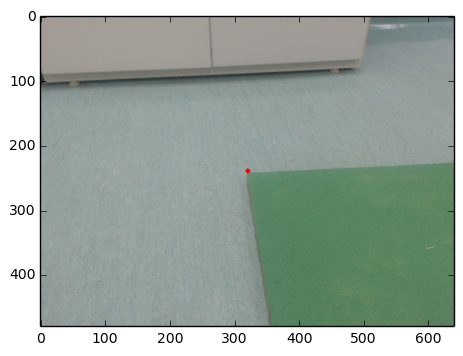

In [104]:
cap = cv2.VideoCapture(0)

while(True):
    ret, image = cap.read() # Lendo imagem na câmera
    
    cv2.circle(image,(image.shape[1]/2,image.shape[0]/2),2,(0,0,255),3)
    
    cv2.imshow('Camera',image) # Exibindo imagem obtida
    
    if cv2.waitKey(1) & 0xFF == ord('q'): # Esperando fps camera
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

## Segmentando a cor laranja

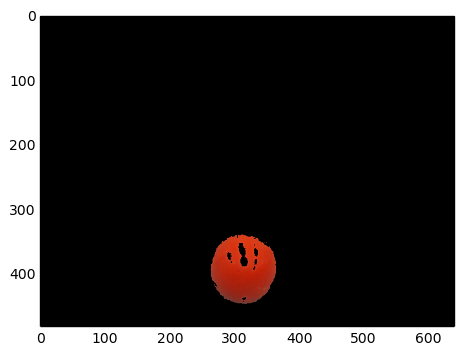

In [3]:
# Limites de segmentação
lower = np.array([0, 0, 100], dtype = "uint8")
upper = np.array([130, 65, 255], dtype = "uint8")

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # Convertendo pra hsv

mask = cv2.inRange(image, lower, upper) # Gerando máscara
#ini-iPython
output = cv2.bitwise_and(image, image, mask = mask) # Aplicando máscara

plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.show()
#end-iPython

## Calculando ponto de interesse
Calculando o centro da bola

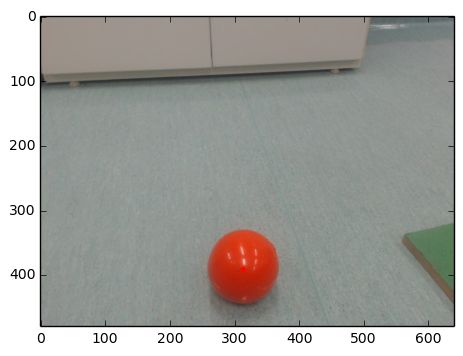

Posição x:  -7 Posição y:  -152


In [4]:
M = cv2.moments(mask)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
cx, cy
#ini-iPython
showimage = image

cv2.circle(showimage,(cx,cy),2,(0,0,255),3)

plt.imshow(cv2.cvtColor(showimage, cv2.COLOR_BGR2RGB))
plt.show()

cy = (image.shape[0]/2) - cy
cx = cx - (image.shape[1]/2)
print 'Posição x: ', cx, 'Posição y: ', cy
#end-iPython

## Descorrendo as fórmulas
Escrevendo as formulas de calibração de câmera

c_h = G · C · R · P · w_h

In [88]:
from sympy import *
init_printing() 
x, y, z, k = symbols("x y z k") # Variaveis basicas da imagem
X, Y, Z = symbols("X Y Z") # Variaveis basicas do mundo

w_h = Matrix([[k*x], # Matrix basica para imagem
              [k*y],
              [k*z],
              [k]])

c_h = Matrix([[k*X], # Matrix basica para mundo
              [k*Y],
              [k*Z],
              [k]])

X_0, Y_0, Z_0 = symbols("X_0 Y_0 Z_0") # Variaveis de translação
G = Matrix([[1, 0, 0, -X_0], # Matrix translação
            [0, 1, 0, -Y_0],
            [0, 0, 1, -Z_0],
            [0, 0, 0, 1]])

r_x, r_y, r_z = symbols("r_x r_y r_z") # Variaveis de translação
C = Matrix([[1, 0, 0, -r_x], # Matrix translação
            [0, 1, 0, -r_y],
            [0, 0, 1, -r_z],
            [0, 0, 0, 1]])

theta, beta, alpha = symbols("\\theta \\beta \\alpha") # Variaveis de rotação
R_x = Matrix([[1, 0, 0, 0], # Matrix translação
              [0, cos(theta), sin(theta), 0],
              [0, -sin(theta), cos(theta), 0],
              [0, 0, 0, 1]])

R_y = Matrix([[cos(beta), 0, -sin(beta), 0], # Matrix translação
              [0, 1, 0, 0],
              [sin(beta), 0, cos(beta), 0],
              [0, 0, 0, 1]])

R_z = Matrix([[cos(alpha), sin(alpha), 0, 0], # Matrix translação
              [-sin(alpha), cos(alpha), 0, 0],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])

lambd = Symbol("\\lambda") # Variaveis de perspectiva
P = Matrix([[1, 0, 0, 0], # Matrix translação
            [0, 1, 0, 0],
            [0, 0, 1, 0],
            [0, 0, -(1/lambd), 1]])

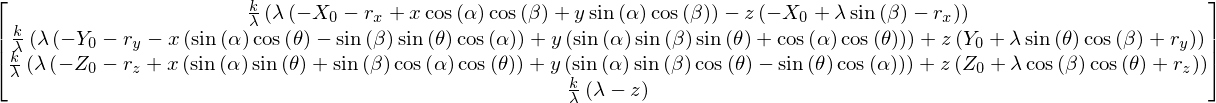

In [89]:
eq = simplify((G * C * R_x * R_y * R_z * P * w_h))
eq

In [105]:
# Medidas em milimitro
DiametroBola = 85.0
DistY = 400.0
DistX = 0
DistZ = DiametroBola/2
AlturaCamera = 458
DistanciaFocal = 3.67
AnguloCabeca = rad(34.3)

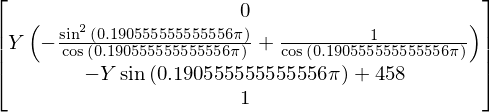

In [131]:
eq = (G.inv()*R_x.inv()*P.inv()*c_h).subs([
w_h
eq = (G.inv()*R_x.inv()*P.inv()).subs([
        [k, 1],
        [X, 0],
        [Z, 0],
        
        [theta, -AnguloCabeca],
        
        [X_0, 0],
        [Y_0, 0],
        [Z_0, AlturaCamera]
    ])
eq

In [135]:
solve(eq[2], Y)